In [1]:
from nmm import csolve,OhmicBath,OverdampedBath
from qutip import Qobj,sigmaz,sigmax,sigmay
import numpy as np
import matplotlib.pyplot as plt

In [2]:
w0 = 1
alpha = 0.05
gamma = 5
T = 1*w0
tf = 40
t=np.linspace(0,tf,200)
Hsys = sigmaz()/2
Q = sigmax()

In [3]:
bath=OverdampedBath(T,alpha,gamma)

In [8]:
cc2 = csolve(Hsys, t ,[bath], [Q],eps=1e-5)

In [9]:
rho0=0.5*Qobj([[1,1],[1,1]])

In [10]:
result=cc2.evolution(rho0)
#result2=cc.evolution(rho0)

1


Computing Exponential of Generators . . . .: 100%|██████████| 200/200 [00:00<00:00, 752.98it/s]


In [11]:
cc2.generators[10]

Quantum object: dims=[[[2], [2]], [[2], [2]]], shape=(4, 4), type='super', isherm=False
Qobj data =
[[-0.36588228+0.j         0.        +0.j         0.        +0.j
   0.16947668+0.j       ]
 [ 0.        +0.j        -0.26767948+0.j        -0.04892008-0.1041142j
   0.        +0.j       ]
 [ 0.        +0.j        -0.04892008+0.1041142j -0.26767948+0.j
   0.        +0.j       ]
 [ 0.36588228+0.j         0.        +0.j         0.        +0.j
  -0.16947668+0.j       ]]

In [12]:
def population(den, a, b):
    return [den[i][a, b] for i in range(len(den))]

In [13]:
# bath = DrudeLorentzPadeBath(Q=Q, lam=alpha*np.pi, gamma=gamma, T=T, Nk=8)
# solver = HEOMSolver(Hsys, bath, max_depth=5)
# result_h = solver.run(rho0, t)

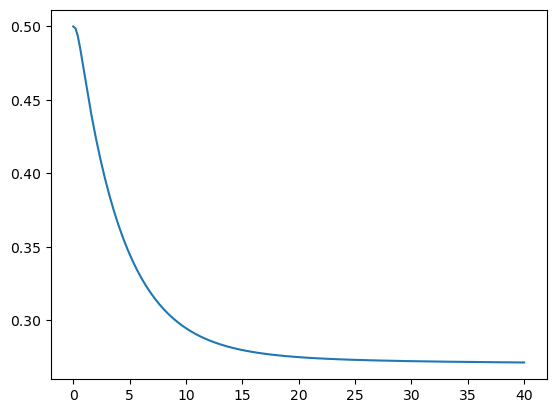

In [14]:
i,j=0,0
plt.plot(t,np.abs(population(result,i,j)))
#plt.plot(t, np.abs(population(result2, i, j)))
# plt.plot(t, np.abs(population(result_h.states, 0, 1)))
# plt.show()

In [15]:
from qutip import brmesolve

In [20]:
def br(rho0,sec=-1):
    DL2 = (
        f"{4*alpha/(gamma)} if (w == 0) else "  # Just taking both limits -> spectral density for pure dephasing
        f"{alpha} *2*pi*w *exp(-abs(w)/{gamma}) * ((1/(exp( w*{1/T})-1))+1)"  # f"2*pi*(2.0 *{lam}*{gamma} *w /(pi*(w**2+{gamma}**2))) * ((1/(exp((w) * {w/T})-1))+1)"
    )
    a_ops = [[Q,DL2]]
    resultBR = brmesolve(
        Hsys, rho0, t, a_ops=a_ops,sec_cutoff=sec
    )
    return resultBR

In [21]:
resultBR=br(rho0)

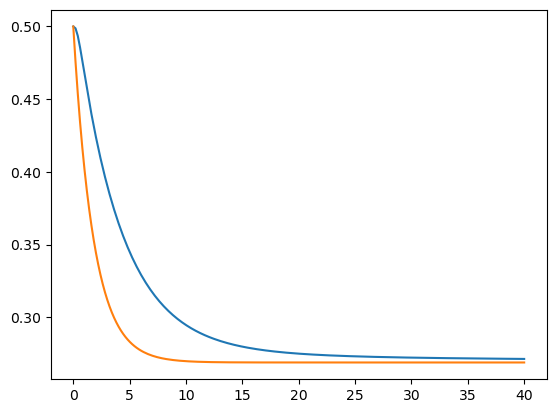

In [24]:
i,j=0,0
plt.plot(t, np.abs(population(result, i, j)))
plt.plot(t, np.abs(population(resultBR.states, i, j)))
#plt.plot(t, np.abs(population(resultBR2.states, i, j)))

plt.show()


In [29]:
from qutip.solver import heom

In [30]:
obp=heom.SpectralFitter(T,Q,w,bath.spectral_density(w)*np.pi)

In [32]:
bathf,fit_info=obp.get_fit(N=7,Nk=4)
fit_info

{'fit_time': 35.095436811447144,
 'rmse': 6.764090608005063e-07,
 'N': 7,
 'params': [array([15.70794747,  2.63220379, 15.70795204,  8.95907639, 15.70795486,
         15.70793569, 15.70795538]),
  array([15.27164953,  5.57472326, 13.82355558,  9.03299741, 19.54325854,
         18.97870777, 20.56385326]),
  array([ 5.91060696,  0.50051033, 55.47451048,  0.5005006 , 16.22579103,
         41.74154576, 28.38681852])],
 'Nk': 4,
 'summary': 'Result of fitting The Spectral Density with 7 terms: \n \n Parameters|   lam    |  gamma   |   w0 \n 1         | 1.57e+01 | 1.53e+01 |5.91e+00\n 2         | 2.63e+00 | 5.57e+00 |5.01e-01\n 3         | 1.57e+01 | 1.38e+01 |5.55e+01\n 4         | 8.96e+00 | 9.03e+00 |5.01e-01\n 5         | 1.57e+01 | 1.95e+01 |1.62e+01\n 6         | 1.57e+01 | 1.90e+01 |4.17e+01\n 7         | 1.57e+01 | 2.06e+01 |2.84e+01\n \nA  normalized RMSE of  6.76e-07 was obtained for the The Spectral Density\n The current fit took  35.095437 seconds'}

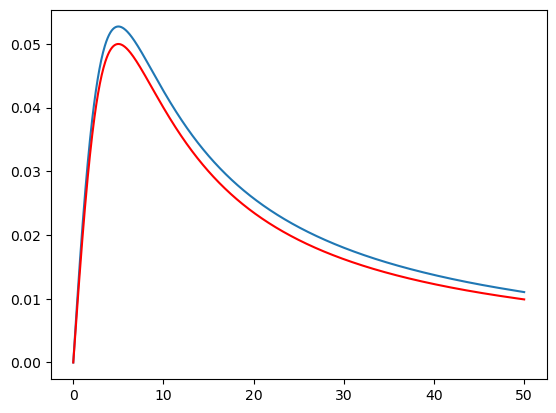

In [33]:
w=np.linspace(0,50,1000)
plt.plot(w,bathf.spectral_density_approx(w)/np.pi)
plt.plot(w,bath.spectral_density(w),color='r')

In [34]:
solver = heom.HEOMSolver(Hsys,[bathf],max_depth=3)

In [35]:
result_heom=solver.run(rho0,t)

10.1%. Run time:   9.21s. Est. time left: 00:00:01:22
20.1%. Run time:  19.24s. Est. time left: 00:00:01:16
30.2%. Run time:  25.65s. Est. time left: 00:00:00:59
40.2%. Run time:  30.84s. Est. time left: 00:00:00:45
50.3%. Run time:  35.08s. Est. time left: 00:00:00:34
60.3%. Run time:  38.38s. Est. time left: 00:00:00:25
70.4%. Run time:  41.07s. Est. time left: 00:00:00:17
80.4%. Run time:  44.35s. Est. time left: 00:00:00:10
90.5%. Run time:  48.36s. Est. time left: 00:00:00:05
100.0%. Run time:  51.32s. Est. time left: 00:00:00:00
Total run time:  51.32s


In [36]:
from scipy import linalg

In [37]:
def rotation(data, t, diagonal=True):
    rotated = [
        linalg.expm(-(1j * Hsys.full()) * t[i])
        @ data[i].full()
        @ linalg.expm((1j * Hsys.full()) * t[i])
        for i in range(len(t))
    ]
    return rotated

cum=rotation(result,t)

In [38]:
import qutip as qt

In [39]:
n1=bath.bose(w0)
n2=bath2.bose(w0)
spc=bath.spectral_density(w0)
Q1=(sigmax()+1j*sigmay())/2
c_ops=[np.sqrt(2*np.pi*(n1)*spc)*(Q1),np.sqrt(2*np.pi*(n1+1)*spc)*(Q1.dag()),
       np.sqrt(2*np.pi*(n2)*spc)*(Q1),np.sqrt(2*np.pi*(n2+1)*spc)*(Q1.dag())]
result_lindblad = qt.mesolve(Hsys, rho0, t, c_ops)

NameError: name 'bath2' is not defined

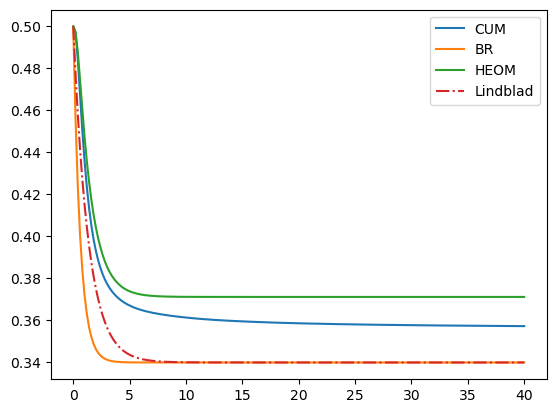

In [ ]:
i,j=0,0
plt.plot(t, np.real(population(cum, i, j)),label='CUM')
plt.plot(t, np.real(population(resultBR.states, i, j)),label='BR')
plt.plot(t, np.real(population(result_heom.states, i, j)),label='HEOM')
plt.plot(t, np.real(population(result_lindblad.states, i, j)),'-.',label='Lindblad')
#plt.axhline(y=0.339921666085097,linestyle='-.')
plt.legend()
plt.show()

In [ ]:
%timeit cc2.Γgen(bath,1,1,50)

104 ms ± 6.66 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [ ]:
cc2.Γgen(bath,1,1,50)

(9.539288030754536+0j)